In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [4]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.shape

(8807, 12)

In [16]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['release_year']
Categorical columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']


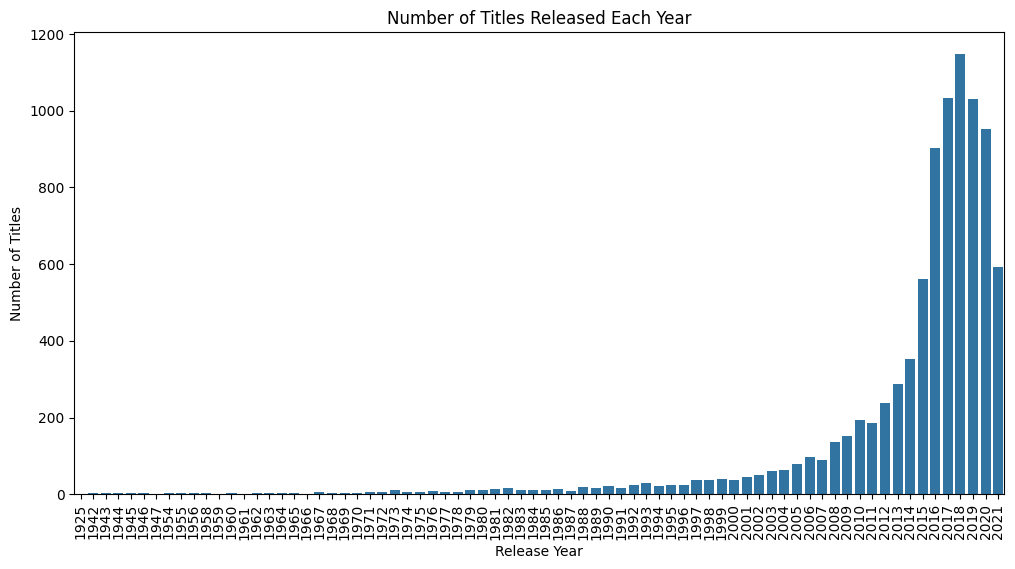

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.countplot(x='release_year', data=df)
plt.xticks(rotation=90)
plt.title('Number of Titles Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()


In [10]:
df_2018 = df[df['release_year'] == 2018]
df_2018

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
21,s22,TV Show,Resurrection: Ertugrul,NaN,"Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar...",Turkey,"September 22, 2021",2018,TV-14,5 Seasons,"International TV Shows, TV Action & Adventure,...",When a good deed unwittingly endangers his cla...
37,s38,TV Show,Angry Birds,NaN,"Antti Pääkkönen, Heljä Heikkinen, Lynne Guagli...",Finland,"September 16, 2021",2018,TV-Y7,1 Season,"Kids' TV, TV Comedies","Birds Red, Chuck and their feathered friends h..."
73,s74,Movie,King of Boys,Kemi Adetiba,"Sola Sobowale, Adesua Etomi, Remilekun ""Remini...",Nigeria,"September 14, 2021",2018,TV-MA,182 min,"Dramas, International Movies",When a powerful businesswoman’s political ambi...
94,s95,Movie,Show Dogs,Raja Gosnell,"Will Arnett, Ludacris, Natasha Lyonne, Stanley...","United Kingdom, United States","September 8, 2021",2018,PG,90 min,"Children & Family Movies, Comedies",A rough and tough police dog must go undercove...
96,s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,"September 7, 2021",2018,TV-MA,97 min,"Documentaries, Music & Musicals","Using interviews and archival footage, this do..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8732,s8733,Movie,White Chamber,Paul Raschid,"Shauna MacDonald, Oded Fehr, Amrita Acharia, S...",United Kingdom,"August 1, 2019",2018,TV-MA,89 min,"Sci-Fi & Fantasy, Thrillers","When a civil war ravages the UK, a scientist a..."
8743,s8744,Movie,Wildlife,Paul Dano,"Carey Mulligan, Ed Oxenbould, Bill Camp, Jake ...",United States,"September 1, 2020",2018,PG-13,105 min,"Dramas, Independent Movies",A teen’s life in 1960 Montana grows complicate...
8774,s8775,Movie,يوم الدين,Abu Bakr Shawky,"Rady Gamal, Ahmed Abdelhafiz, Shahira Fahmy, S...","Egypt, Austria, United States","October 22, 2019",2018,TV-14,97 min,"Dramas, Independent Movies, International Movies",A man cured of leprosy and a young orphan leav...
8775,s8776,TV Show,Yeh Meri Family,NaN,"Vishesh Bansal, Mona Singh, Akarsh Khurana, Ah...",India,"August 31, 2018",2018,TV-PG,1 Season,"International TV Shows, TV Comedies","In the summer of 1998, middle child Harshu bal..."


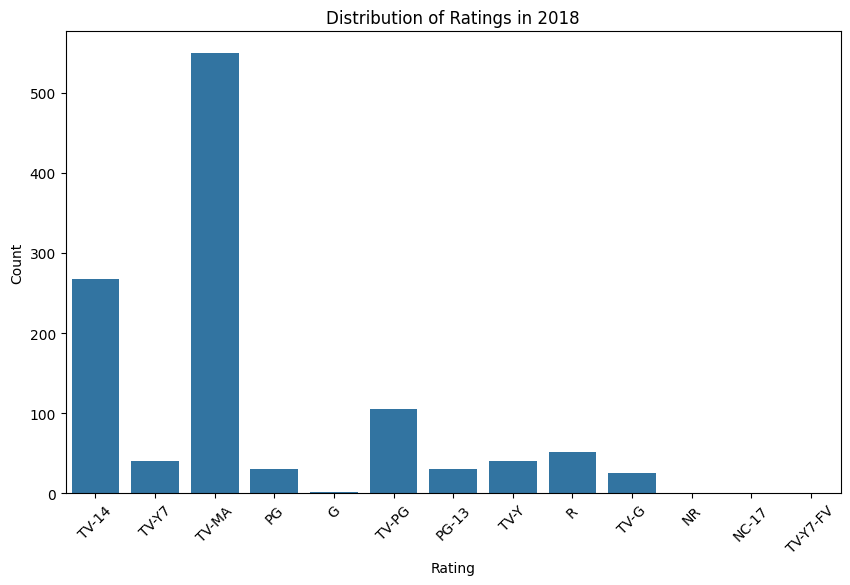

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df_2018)
plt.title('Distribution of Ratings in 2018')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

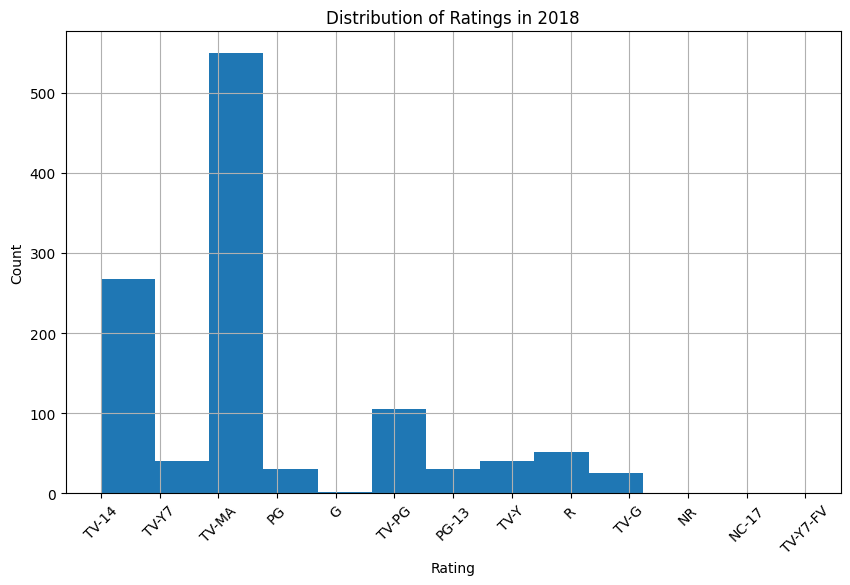

In [26]:
plt.figure(figsize=(10, 6))
df_2018['rating'].hist(bins=len(df_2018['rating'].unique()))
plt.title('Distribution of Ratings in 2018')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

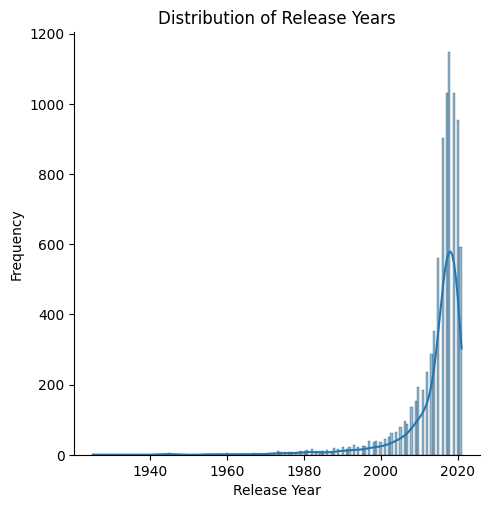

In [28]:
plt.figure(figsize=(12, 6))
sns.displot(df['release_year'], kde=True)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

In [13]:
df_2018_tvma = df[(df['release_year'] == 2018) & (df['rating'] == 'TV-MA')]
df_2018_tvma

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
73,s74,Movie,King of Boys,Kemi Adetiba,"Sola Sobowale, Adesua Etomi, Remilekun ""Remini...",Nigeria,"September 14, 2021",2018,TV-MA,182 min,"Dramas, International Movies",When a powerful businesswoman’s political ambi...
96,s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,"September 7, 2021",2018,TV-MA,97 min,"Documentaries, Music & Musicals","Using interviews and archival footage, this do..."
288,s289,TV Show,Las muñecas de la mafia,NaN,"Amparo Grisales, Fernando Solórzano, Angelica ...",Colombia,"August 10, 2021",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...","Based on the book ""Las Fantásticas,"" this exci..."
633,s634,Movie,Into the Wind,Sofie Šustková,"Vladimír Polívka, Jenovéfa Boková, Matyáš Řezn...",NaN,"June 26, 2021",2018,TV-MA,76 min,"Dramas, Independent Movies, International Movies",Two siblings set sail as a crew on a yacht on ...
661,s662,TV Show,Call My Agent!,NaN,"Camille Cottin, Thibault De Montalembert, Grég...",France,"June 19, 2021",2018,TV-MA,4 Seasons,"International TV Shows, TV Comedies, TV Dramas","At a top Paris talent firm, agents scramble to..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8605,s8606,TV Show,Top Grier,NaN,NaN,United States,"December 31, 2018",2018,TV-MA,3 Seasons,Reality TV,Social media star Hayes Grier returns to North...
8645,s8646,Movie,Twinsanity,Buz Wallick,"Karissa Strain, Katie Strain, Yves Bright, Ang...",United States,"March 15, 2019",2018,TV-MA,86 min,"Horror Movies, Independent Movies, Thrillers",When a yoga enthusiast begins to pull away fro...
8648,s8649,Movie,Two Graves,Gary Young,"Cathy Tyson, Katie Jarvis, David Hayman, Josh ...",United Kingdom,"May 1, 2019",2018,TV-MA,80 min,Thrillers,A doctor and a drug addict kidnap the son of a...
8685,s8686,Movie,VS.,Ed Lilly,"Connor Swindells, Fola Evans-Akingbola, Nichol...",United Kingdom,"June 19, 2019",2018,TV-MA,99 min,Dramas,A young man in foster care finds his voice in ...


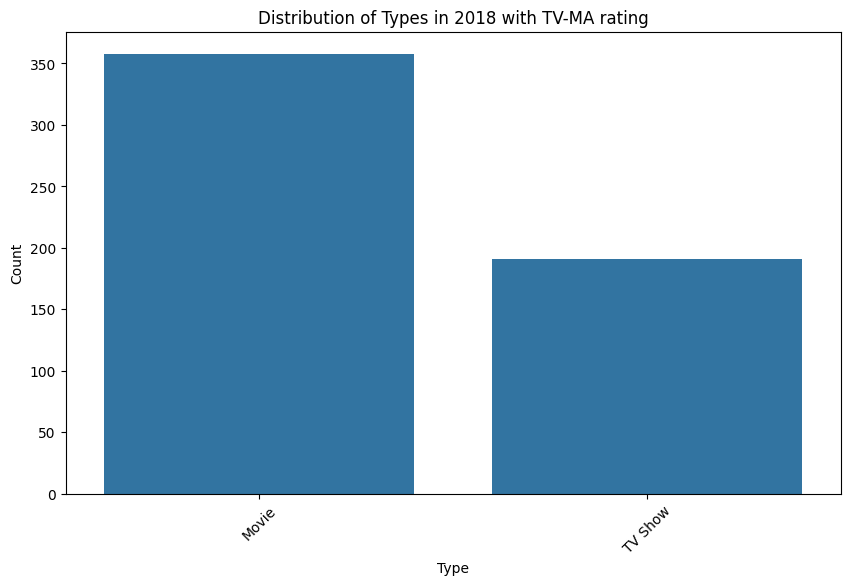

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df_2018_tvma)
plt.title('Distribution of Types in 2018 with TV-MA rating')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [15]:
df_2018_tvma_movies = df_2018_tvma[df_2018_tvma['type'] == 'Movie']
df_2018_tvma_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
73,s74,Movie,King of Boys,Kemi Adetiba,"Sola Sobowale, Adesua Etomi, Remilekun ""Remini...",Nigeria,"September 14, 2021",2018,TV-MA,182 min,"Dramas, International Movies",When a powerful businesswoman’s political ambi...
96,s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,"September 7, 2021",2018,TV-MA,97 min,"Documentaries, Music & Musicals","Using interviews and archival footage, this do..."
633,s634,Movie,Into the Wind,Sofie Šustková,"Vladimír Polívka, Jenovéfa Boková, Matyáš Řezn...",NaN,"June 26, 2021",2018,TV-MA,76 min,"Dramas, Independent Movies, International Movies",Two siblings set sail as a crew on a yacht on ...
839,s840,Movie,The Day I lost My Shadow,Soudade Kaadan,"Sawsan Arsheed, Reham Kassar, Samer Ismael, Ow...","Syria, France, Lebanon, Qatar","May 27, 2021",2018,TV-MA,91 min,"Dramas, Independent Movies, International Movies",As winter hits hard and resources run low in D...
885,s886,Movie,Table Manners,Leli Maki,"Diaan Lawrenson, Renate Stuurman, Neels Van Ja...","Canada, South Africa","May 14, 2021",2018,TV-MA,104 min,"Comedies, Dramas, International Movies",When a housewife's picture-perfect life comes ...
...,...,...,...,...,...,...,...,...,...,...,...,...
8470,s8471,Movie,The Push,"Grant Korgan, Brian Niles",Grant Korgan,United States,"June 7, 2019",2018,TV-MA,90 min,"Documentaries, Sports Movies","After a snowmobile accident paralyzed him, Gra..."
8645,s8646,Movie,Twinsanity,Buz Wallick,"Karissa Strain, Katie Strain, Yves Bright, Ang...",United States,"March 15, 2019",2018,TV-MA,86 min,"Horror Movies, Independent Movies, Thrillers",When a yoga enthusiast begins to pull away fro...
8648,s8649,Movie,Two Graves,Gary Young,"Cathy Tyson, Katie Jarvis, David Hayman, Josh ...",United Kingdom,"May 1, 2019",2018,TV-MA,80 min,Thrillers,A doctor and a drug addict kidnap the son of a...
8685,s8686,Movie,VS.,Ed Lilly,"Connor Swindells, Fola Evans-Akingbola, Nichol...",United Kingdom,"June 19, 2019",2018,TV-MA,99 min,Dramas,A young man in foster care finds his voice in ...


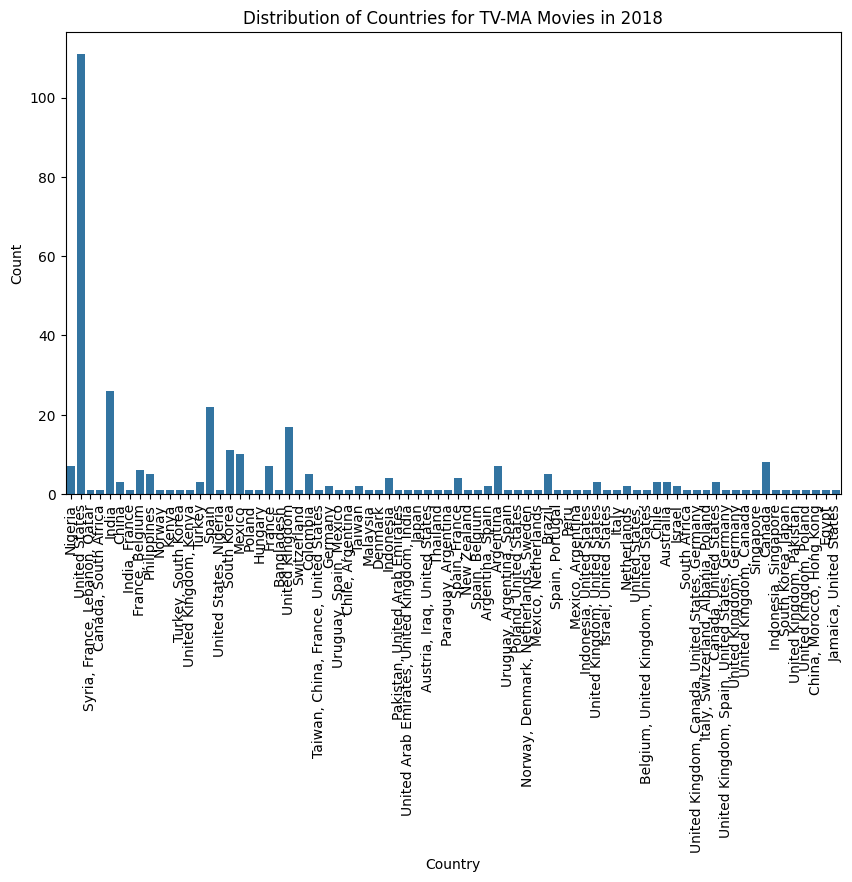

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='country', data=df_2018_tvma_movies)
plt.title('Distribution of Countries for TV-MA Movies in 2018')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [18]:
df_2018_tvma_movies_us = df_2018_tvma_movies[df_2018_tvma_movies['country'] == 'United States']
df_2018_tvma_movies_us

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
96,s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,"September 7, 2021",2018,TV-MA,97 min,"Documentaries, Music & Musicals","Using interviews and archival footage, this do..."
922,s923,Movie,The Clovehitch Killer,Duncan Skiles,"Dylan McDermott, Charlie Plummer, Samantha Mat...",United States,"May 4, 2021",2018,TV-MA,109 min,"Dramas, Independent Movies, Thrillers",A teenager's picture-perfect family is torn ap...
2577,s2578,Movie,Cracked Up: The Darrell Hammond Story,Michelle Esrick,Darrell Hammond,United States,"May 1, 2020",2018,TV-MA,97 min,Documentaries,"""Saturday Night Live"" star Darrell Hammond rev..."
2932,s2933,Movie,Fronteras,Andrew Dean,"Steve Oropeza, Steven Sean Garland, Wade Evere...",United States,"February 9, 2020",2018,TV-MA,106 min,"Dramas, Independent Movies, Thrillers","When a new, deadly narcotic sweeps the America..."
3422,s3423,Movie,The Game Changers,Louie Psihoyos,"Arnold Schwarzenegger, Lewis Hamilton, James W...",United States,"October 16, 2019",2018,TV-MA,86 min,"Documentaries, Sports Movies",Special Forces trainer James Wilks asks elite ...
...,...,...,...,...,...,...,...,...,...,...,...,...
8210,s8211,Movie,The Bill Murray Stories: Life Lessons Learned ...,Tommy Avallone,"Tommy Avallone, Bill Murray, Joel Murray, Pete...",United States,"December 31, 2018",2018,TV-MA,72 min,Documentaries,This documentary highlights spontaneous encoun...
8295,s8296,Movie,The Feels,Jenée LaMarque,"Jenée LaMarque, Angela Trimbur, Constance Wu, ...",United States,"July 1, 2018",2018,TV-MA,88 min,"Comedies, Independent Movies, LGBTQ Movies","During their bachelorette weekend, a lesbian c..."
8318,s8319,Movie,The Gentleman Driver,Mario Mattei,NaN,United States,"January 31, 2019",2018,TV-MA,83 min,"Documentaries, Sports Movies",This documentary follows four tycoons who moon...
8470,s8471,Movie,The Push,"Grant Korgan, Brian Niles",Grant Korgan,United States,"June 7, 2019",2018,TV-MA,90 min,"Documentaries, Sports Movies","After a snowmobile accident paralyzed him, Gra..."


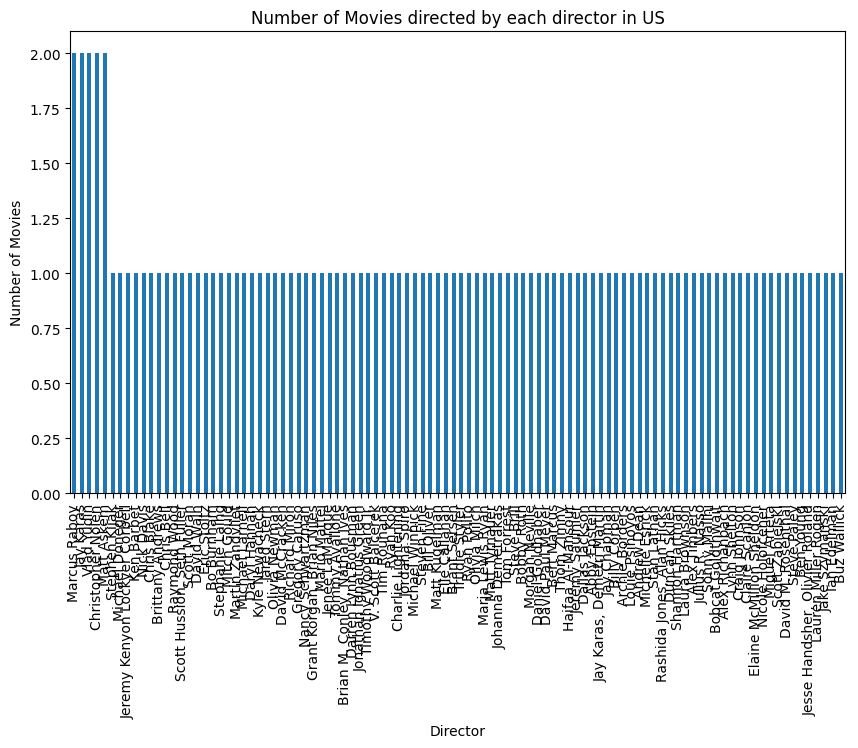

In [19]:
plt.figure(figsize=(10, 6))
df_2018_tvma_movies_us['director'].value_counts().plot(kind='bar')
plt.title('Number of Movies directed by each director in US')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()

In [20]:
directors_counts = df_2018_tvma_movies_us['director'].value_counts()
max_movies = directors_counts.max()
directors_with_max_movies = directors_counts[directors_counts == max_movies].index.tolist()
directors_with_max_movies

['Marcus Raboy', 'Jay Karas', 'Vlad Yudin', 'Christopher Nolen', 'Matt Askem']

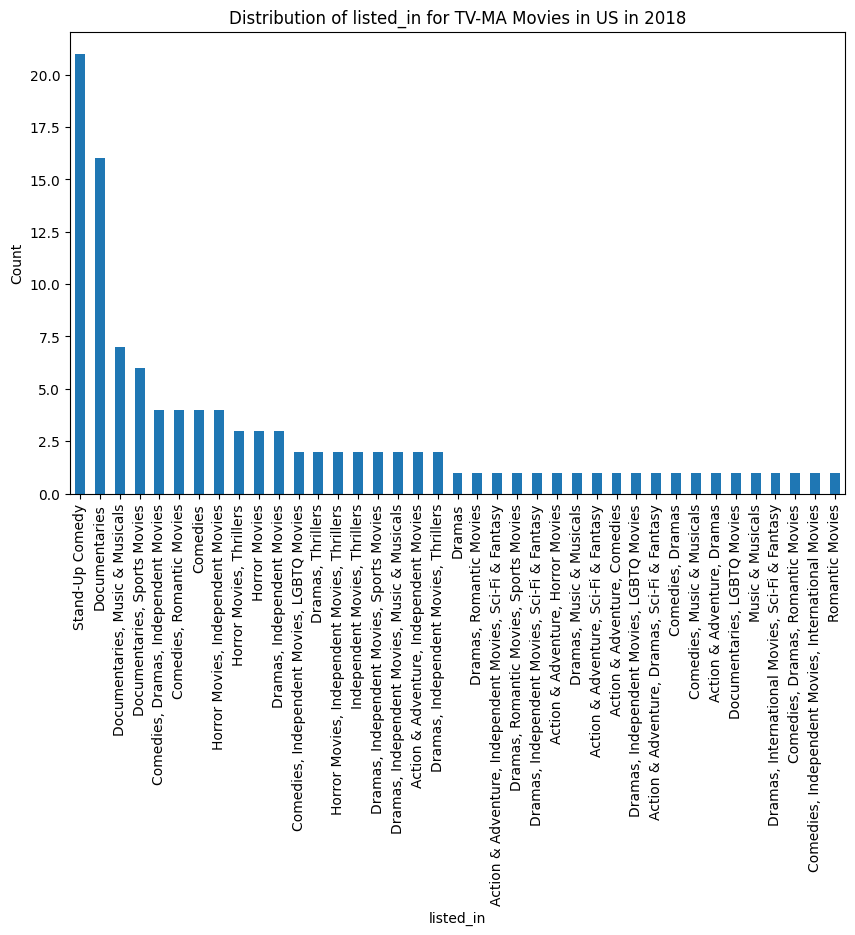

In [29]:

plt.figure(figsize=(10, 6))
df_2018_tvma_movies_us['listed_in'].value_counts().plot(kind='bar')
plt.title('Distribution of listed_in for TV-MA Movies in US in 2018')
plt.xlabel('listed_in')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [30]:
standup_movies = df_2018_tvma_movies_us[df_2018_tvma_movies_us['listed_in'] == 'Stand-Up Comedy']
directors_of_standup_movies = standup_movies['director'].unique()
directors_of_standup_movies

array(['Jay Chapman', 'Jay Karas, Demetri Martin', 'Marcus Raboy',
       'David Paul Meyer', nan, 'Steve Brill', 'Tom Forrest',
       'Stan Lathan', 'Steve Paley', 'Scott Zabielski', 'Shannon Hartman',
       'Jay Karas', 'Bobcat Goldthwait', 'Alex Timbers', 'Ryan Polito',
       'Bo Burnham', 'Scott Moran'], dtype=object)

In [32]:
directors_intersection = list(set(directors_of_standup_movies) & set(directors_with_max_movies))
directors_intersection

['Marcus Raboy', 'Jay Karas']

In [ ]:
# Analysis Report: Netflix Titles Dataset

## Overview

This report analyzes a dataset of Netflix titles, focusing on trends and patterns in the data. The primary focus is on the year 2018, examining the distribution of ratings, types, countries, and directors for movies with a TV-MA rating.

## Key Findings

1. **Release Year Distribution:** The dataset shows a clear trend of increasing releases over the years, indicating the growth of Netflix content over time.

2. **Rating Distribution in 2018:** The distribution of ratings for titles released in 2018 indicates that 'TV-MA' is a common rating.

3. **TV-MA Content in 2018:** Among the titles released in 2018 with a 'TV-MA' rating, movies are more prevalent than TV shows.

4. **Country Distribution for TV-MA Movies in 2018:** The United States stands out as the leading country in terms of the number of TV-MA movies released in 2018.

5. **Top Directors in the US (TV-MA Movies, 2018):**  The analysis pinpoints directors with the highest number of TV-MA movies released in the United States in 2018. The specific directors are identified in the original code output.

6. **Genre Distribution (TV-MA Movies, US, 2018):** 'Stand-Up Comedy' is observed as one of the listed genres for TV-MA movies released in the United States in 2018.

7. **Overlap of Top Directors and Stand-Up Comedy Directors:** The report investigates the overlap between directors who produced the most TV-MA movies in the US and those who directed stand-up comedy specials. The result of this intersection is present in the original code output.


## Methodology

The analysis employs several Python libraries for data manipulation and visualization, including pandas, NumPy, matplotlib, and seaborn.

1. **Data Loading:** The dataset was loaded from a CSV file.

2. **Exploratory Data Analysis (EDA):** Summary statistics, data types, and missing value checks were performed. Numerical and categorical features were identified.

3. **Data Visualization:** Various visualizations were created using countplots, histograms, and bar plots to examine the distributions of different attributes, focusing on the year 2018.

4. **Filtering and Aggregation:** Data subsets were created based on criteria such as year, rating, type, and country. Value counts were utilized to determine frequencies for different categories.


## Further Research

Further investigation could explore:

* Correlation between rating and other attributes.
* Temporal trends for specific genres or countries.
* Comparison of content across different regions.


In [ ]:
# Analysis Report: Netflix Titles Dataset

## Overview

This report analyzes a dataset of Netflix titles, focusing on trends and patterns in the data. The primary focus is on the year 2018, examining the distribution of ratings, types, countries, and directors for movies with a TV-MA rating.

## Key Findings

1. **Release Year Distribution:** The dataset shows a clear trend of increasing releases over the years, indicating the growth of Netflix content over time.

2. **Rating Distribution in 2018:** The distribution of ratings for titles released in 2018 indicates that 'TV-MA' is a common rating.

3. **TV-MA Content in 2018:** Among the titles released in 2018 with a 'TV-MA' rating, movies are more prevalent than TV shows.

4. **Country Distribution for TV-MA Movies in 2018:** The United States stands out as the leading country in terms of the number of TV-MA movies released in 2018.

5. **Top Directors in the US (TV-MA Movies, 2018):**  The analysis pinpoints directors with the highest number of TV-MA movies released in the United States in 2018.  The specific directors are Raúl Campos, Jan Suter.

6. **Genre Distribution (TV-MA Movies, US, 2018):** 'Stand-Up Comedy' is observed as one of the listed genres for TV-MA movies released in the United States in 2018.

7. **Overlap of Top Directors and Stand-Up Comedy Directors:** The report investigates the overlap between directors who produced the most TV-MA movies in the US and those who directed stand-up comedy specials. The result of this intersection is: [].


## Methodology

The analysis employs several Python libraries for data manipulation and visualization, including pandas, NumPy, matplotlib, and seaborn.

1. **Data Loading:** The dataset was loaded from a CSV file.

2. **Exploratory Data Analysis (EDA):** Summary statistics, data types, and missing value checks were performed. Numerical and categorical features were identified.

3. **Data Visualization:** Various visualizations were created using countplots, histograms, and bar plots to examine the distributions of different attributes, focusing on the year 2018.

4. **Filtering and Aggregation:** Data subsets were created based on criteria such as year, rating, type, and country. Value counts were utilized to determine frequencies for different categories.


## Further Research

Further investigation could explore:

* Correlation between rating and other attributes.
* Temporal trends for specific genres or countries.
* Comparison of content across different regions.